<a href="https://colab.research.google.com/github/mumbimuthiga/data_handling/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

file=files.upload()

Saving Loan Prediction data - Loan Prediction data.csv to Loan Prediction data - Loan Prediction data.csv


In [3]:
import pandas as pd
loan=pd.read_csv("/content/Loan Prediction data - Loan Prediction data.csv")
loan.shape # Get rows and columns
loan.info()  # Get data set information (Data types and size of each column)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
print(loan.isnull().sum()) #check for missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
loan_copy = loan.copy() # copy the original data set to a copy
loan_copy.fillna(loan.median(numeric_only=True), inplace=True) # use median to fill for numerical values
for column in loan_copy.select_dtypes(include=['object']).columns:  # For non-numerical use the mode
    loan_copy[column].fillna(loan_copy[column].mode()[0], inplace=True)

loan_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<ipython-input-5-5b1355376a3e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_copy[column].fillna(loan_copy[column].mode()[0], inplace=True)


In [6]:
loan_copy.drop_duplicates(inplace=True)
loan_copy.info()
duplicated_count = loan.duplicated().sum()
duplicated_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


0

Original data points: 614; After outlier removal: 614


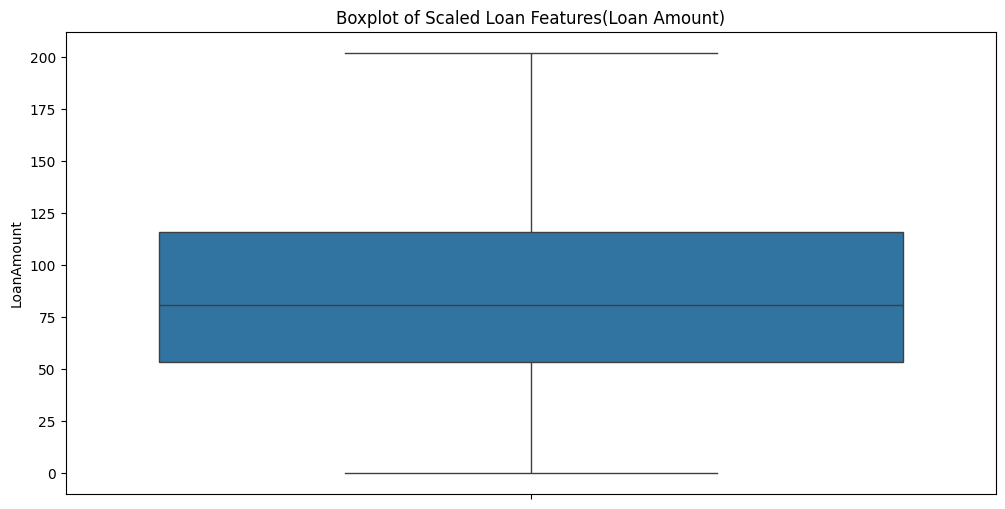

NameError: name 'lower_bound' is not defined

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loan_copy['Z_score'] = np.abs(stats.zscore(loan_copy['LoanAmount']))
outliers = loan_copy[loan_copy['Z_score'] > 3]  # Outliers are usually beyond 3 standard deviations
#print(outliers)
filtered_entries=loan_copy[loan_copy['Z_score'] < 3]; # Data without the Outliers

print(f"Original data points: {len(loan_copy)}; After outlier removal: {len(filtered_entries)}")

plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_copy['LoanAmount'])
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Loan Features(Loan Amount)")
plt.show()

#Handling Outliers

loan_copy['LoanAmount'] = loan_copy['LoanAmount'].clip(lower_bound['LoanAmount'], upper_bound['LoanAmount'])



Original data points: 8; After outlier removal: 8


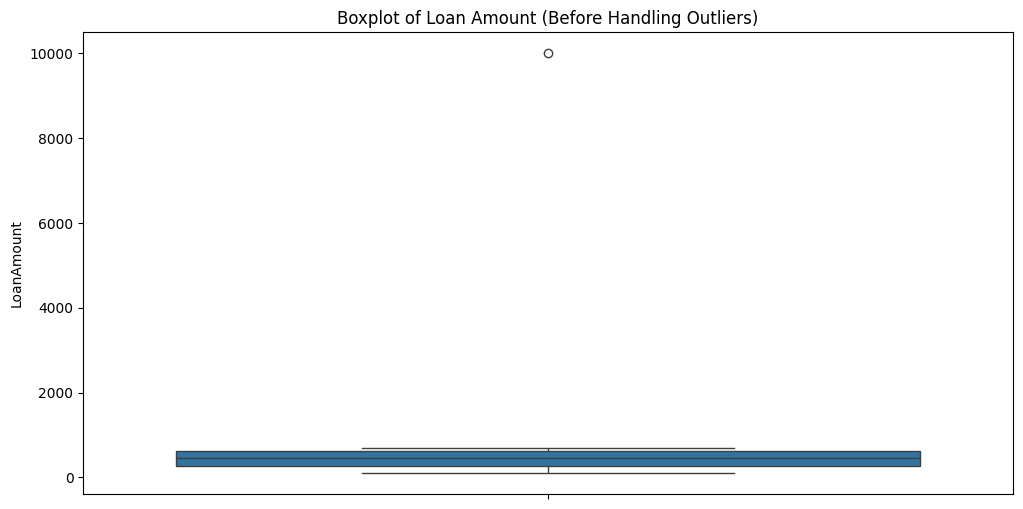

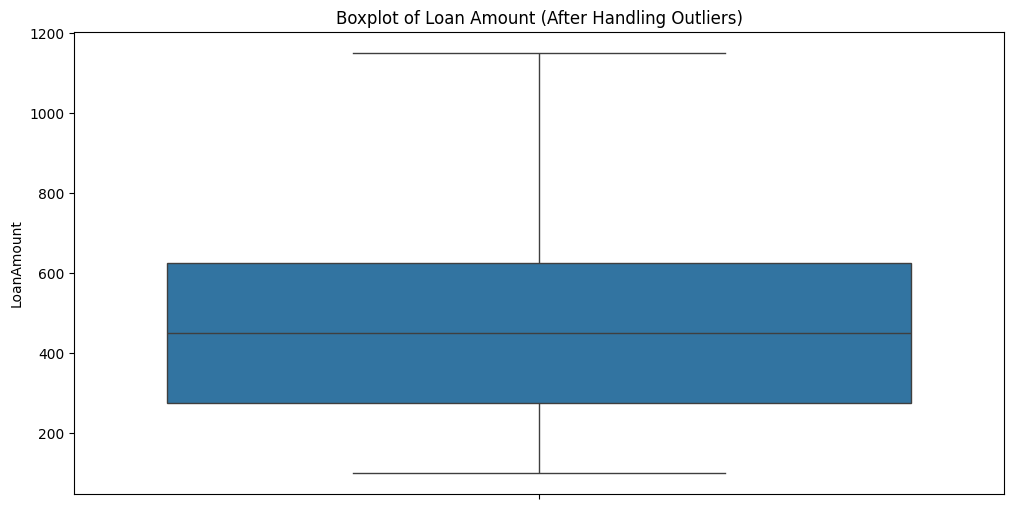

In [20]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Sample Data
loan_copy = pd.DataFrame({'LoanAmount': [100, 200, 300, 400, 500, 600, 700, 10000]})

# Compute Z-scores
loan_copy['Z_score'] = np.abs(stats.zscore(loan_copy['LoanAmount']))

# Identify Outliers
outliers = loan_copy[loan_copy['Z_score'] > 3]  # Outliers are usually beyond 3 standard deviations
filtered_entries = loan_copy[loan_copy['Z_score'] < 3]  # Data without the outliers

print(f"Original data points: {len(loan_copy)}; After outlier removal: {len(filtered_entries)}")

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_copy['LoanAmount'])
plt.xticks(rotation=45)
plt.title("Boxplot of Loan Amount (Before Handling Outliers)")
plt.show()

# **Fix: Calculate IQR Bounds for Clipping**
Q1 = loan_copy['LoanAmount'].quantile(0.25)
Q3 = loan_copy['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# **Fix: Apply Clipping Correctly**
loan_copy['LoanAmount'] = loan_copy['LoanAmount'].clip(lower=lower_bound, upper=upper_bound)

# Boxplot After Clipping
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_copy['LoanAmount'])
plt.xticks(rotation=45)
plt.title("Boxplot of Loan Amount (After Handling Outliers)")
plt.show()


In [26]:
loan_copy.info()

#Normalization on Numerical Data
from sklearn.preprocessing import MinMaxScaler

num_records=['ApplicantIncome'];
scaler=MinMaxScaler()
loan[num_records]=scaler.fit_transform(loan[num_records])
loan.head()

#Standardization
from sklearn.preprocessing import StandardScaler

num_records=['ApplicantIncome'];
scaler=StandardScaler()
loan[num_records]=scaler.fit_transform(loan[num_records]);
loan.head()
loan.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LoanAmount  8 non-null      int64  
 1   Z_score     8 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 260.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  


In [30]:
#Encoding using Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features=['Gender','Married','Dependents','Education',
                      'Self_Employed','CoapplicantIncome','LoanAmount',
                      'Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
encoder=LabelEncoder()

for i in categorical_features:
    loan[i]=encoder.fit_transform(loan[i])

loan.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.072991,0,203,8,1,2,1
1,LP001003,1,1,1,0,0,-0.134412,60,81,8,1,0,0
2,LP001005,1,1,0,0,1,-0.393747,0,26,8,1,2,1
3,LP001006,1,1,0,1,0,-0.462062,160,73,8,1,2,1
4,LP001008,1,0,0,0,0,0.097728,0,94,8,1,2,1


In [32]:
summary_stats = loan.describe()
summary_stats

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,9.547195e-17,78.884365,91.068404,7.713355,0.936482,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,1.000815e+00,92.623999,50.110467,1.161895,0.471924,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-4.138159e-01,0.000000,53.250000,8.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-2.606393e-01,33.500000,82.000000,8.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,6.414426e-02,153.750000,123.000000,8.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,1.238462e+01,286.000000,203.000000,10.000000,2.000000,2.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 62.5+ KB


<ipython-input-36-e634945dd926>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LoanAmount", data=loan, palette="coolwarm")


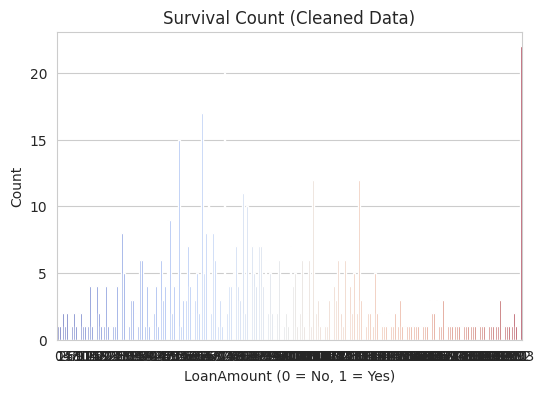

In [36]:
loan.info()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="LoanAmount", data=loan, palette="coolwarm")
plt.title("Loan Amount Distribution")
plt.xlabel("LoanAmount (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

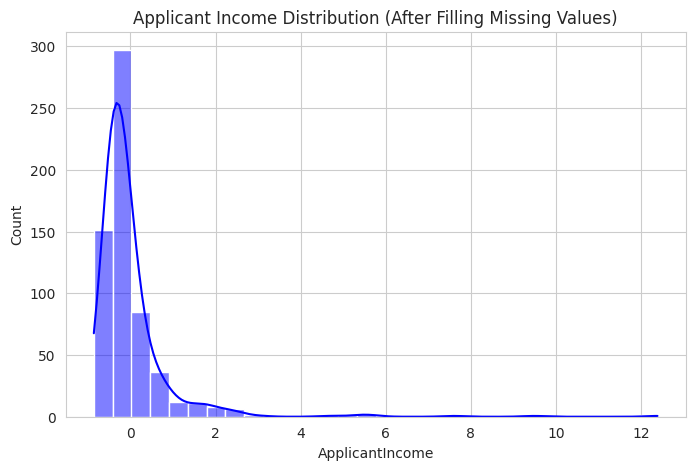

<ipython-input-40-d175c148a91e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education",y="LoanAmount",data=loan,palette="viridis")


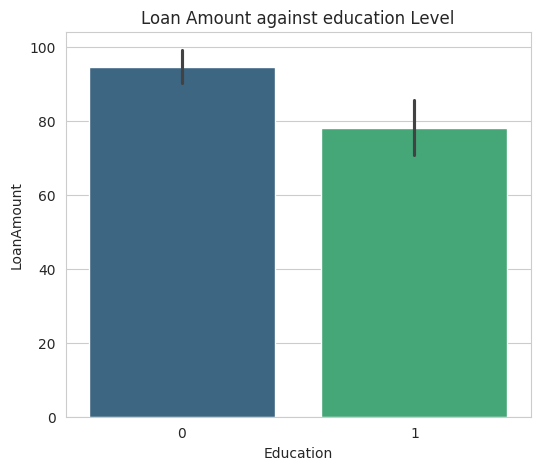

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(loan["ApplicantIncome"], bins=30, kde=True, color="blue")
plt.title("Applicant Income Distribution (After Filling Missing Values)")
plt.xlabel("ApplicantIncome")
plt.ylabel("Count")
plt.show()



<ipython-input-53-578ca4136fff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dependents",y="LoanAmount",data=loan,palette="pastel")


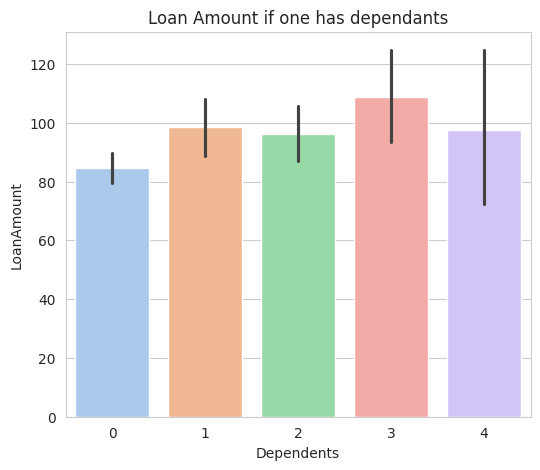

In [53]:
plt.figure(figsize=(6,5))
#sns.barplot(x="Education",y="LoanAmount",data=loan,palette="viridis")
sns.barplot(x="Dependents",y="LoanAmount",data=loan,palette="pastel")
#plt.title("Loan Amount against education Level")
plt.title("Loan Amount if one has dependants")
#plt.xlabel("Education")
plt.xlabel("Dependents")
plt.ylabel("LoanAmount")
plt.show()